In [1]:
param = {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0}

In [2]:
param

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0}

In [5]:
from sklearn import tree
import numpy as np
import sklearn
import pandas as pd

In [6]:
#Load the data
data = pd.read_csv("data/drug_consumption.data")
D_input_cols = data.iloc[:, 0:13]
# We are only concerned with 'Alcohol' Class
D_target = data.iloc[:, 13]
# D_input_cols and D_target together form the dataset D

#Convert C1 (CL0) and C2 (CL1) to non-user (0) and all other classes to user (1)
D_target.loc[(D_target == "CL1") | (D_target == "CL0")] = 0
D_target.loc[D_target != 0] = 1

#Convert to numpy.array
D_target = np.array(D_target).astype('int')
D_input_cols = np.array(D_input_cols)

/var/folders/zd/7g_t0tm57rb0_l5_prv_0kww0000gn/T/ipykernel_47391/1424043466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_target.loc[(D_target == "CL1") | (D_target == "CL0")] = 0
/var/folders/zd/7g_t0tm57rb0_l5_prv_0kww0000gn/T/ipykernel_47391/1424043466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_target.loc[D_target != 0] = 1


In [7]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import (SMOTE, RandomOverSampler, ADASYN, SVMSMOTE)
def get_sampler(name, params):
    samplers= {
        "RandomOverSampler": RandomOverSampler,
        "ADASYN": ADASYN,
        "SVMSMOTE": SVMSMOTE,
        "SMOTE": SMOTE,
    }
    return samplers[name](**params)

In [9]:
sampler = get_sampler("RandomOverSampler", {"sampling_strategy": 0.9})

DB1_X, DB1_y = sampler.fit_resample(D_input_cols, D_target)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DB1_X,\
     DB1_y, test_size = 0.33, random_state = 5)

In [12]:
cls = tree.DecisionTreeClassifier(**param)

In [13]:
cls.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0)

In [14]:
cls.score(X_train, y_train)

0.9913457377758547

In [15]:
cls.score(X_test, y_test)

0.9604916593503073

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_train = cls.predict(X_train)
y_pred_test = cls.predict(X_test)
c_train = confusion_matrix(y_train, y_pred_train)
c_test = confusion_matrix(y_test, y_pred_test)

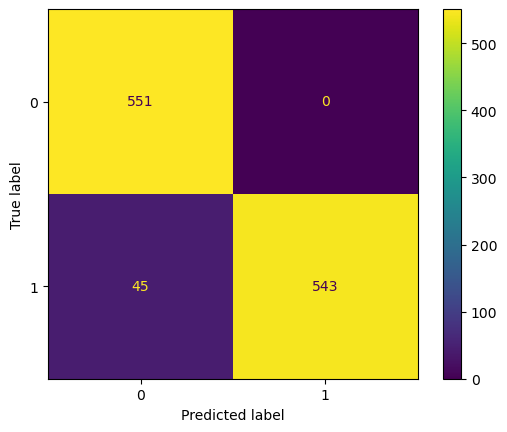

In [24]:
ConfusionMatrixDisplay(confusion_matrix=c_test, display_labels=cls.classes_).plot()

In [49]:
from sklearn.metrics import precision_recall_fscore_support

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def get_confusion(cls, param, X_train, X_test, y_train, y_test):
    cls = cls(**param)
    cls.fit(X_train, y_train)
    y_pred_train = cls.predict(X_train)
    y_pred_test = cls.predict(X_test)
    c_test = confusion_matrix(y_test, y_pred_test)
    test_acc = cls.score(X_test, y_test)
    train_acc = cls.score(X_train, y_train)
    scores = precision_recall_fscore_support(y_test, y_pred_test, average="weighted")
    return c_test, cls, scores

In [54]:
param_knn = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.0, 'random_state': 0}

In [55]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier
cf, cls, score  = get_confusion(cls, param_knn, X_train, X_test, y_train, y_test)

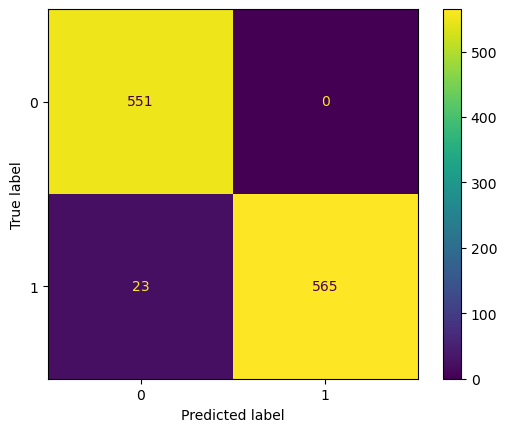

In [56]:
ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=cls.classes_).plot()

In [64]:
print(f"Precision: {score[0]:.4f}\nRecall: {score[1]:.4f}\nFscore: {score[2]:.4f}")

Precision: 0.9806
Recall: 0.9798
Fscore: 0.9798
